In [24]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt


# 5-1

In [34]:

def bgr_to_hsi(img):
    with np.errstate(divide='ignore', invalid='ignore'):
        bgr = np.int32(cv2.split(img))

        blue = bgr[0]
        green = bgr[1]
        red = bgr[2]

        intensity = np.divide(blue + green + red, 3)

        minimum = np.minimum(np.minimum(red, green), blue)
        saturation = 1 - 3 * np.divide(minimum, red + green + blue)

        sqrt_calc = np.sqrt(((red - green) * (red - green)) + ((red - blue) * (green - blue)))

        if (green >= blue).any():
            hue = np.arccos((1/2 * ((red-green) + (red - blue)) / sqrt_calc))
        else:
            hue = 2*np.pi - np.arccos((1/2 * ((red-green) + (red - blue)) / sqrt_calc))

        hue = hue*180/np.pi

        hsi = cv2.merge((hue, saturation, intensity))
    return hsi

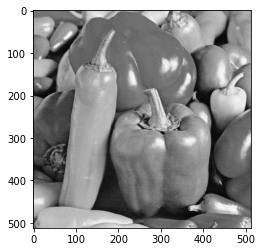

In [35]:
pepper_bgr = cv2.imread('../Images/5/Pepper.bmp') # images have BGR color space by default in opencv 
pepper_hsv = bgr_to_hsi(pepper_bgr)
pepper_hsv_h = pepper_hsv[:,:,0]
pepper_hsv_s = pepper_hsv[:,:,1]
pepper_hsv_v = pepper_hsv[:,:,2]

cv2.imwrite(f'./pepper_hsv/pepper_hsv_h.jpg' ,pepper_hsv_h)
cv2.imwrite(f'./pepper_hsv/pepper_hsv_s.jpg' ,pepper_hsv_s)
cv2.imwrite(f'./pepper_hsv/pepper_hsv_v.jpg' ,pepper_hsv_v)
plt.imshow(pepper_hsv_v , cmap="gray")

# 5-2

In [3]:
def quantize_color_image(img, level = 8 ):
    segment_size = 256/level
    return ((img/segment_size).astype(np.uint8)*segment_size).astype(np.uint8)


def get_image_compare_parameters(img1 , img2):
    mse = np.mean((img1 - img2)**2)
    rmse = math.sqrt(mse)
    max_intensity = 255
    psnr = 20*np.log10(max_intensity / rmse)
    
    
    return mse , psnr

quantize_levels = [64,32,16,8]
for lvl in quantize_levels:
    pepper_quantize  = quantize_color_image(pepper_bgr , lvl)
    cv2.imwrite(f'./quantized/pepper_lvl{lvl}.jpg' ,pepper_quantize )
    mse,psnr = get_image_compare_parameters(pepper_bgr , pepper_quantize)
    print(f"quantize level={lvl} , mse : {mse} , psnr : {psnr}")

quantize level=64 , mse : 3.3510589599609375 , psnr : 42.87898291803028
quantize level=32 , mse : 16.671788533528645 , psnr : 35.91098167843973
quantize level=16 , mse : 73.30510965983073 , psnr : 29.47946113106358
quantize level=8 , mse : 88.96579488118489 , psnr : 28.638572974779876


In [11]:
quantized_image = np.zeros(pepper_bgr.shape)
quantized_image[:,:,0] = quantize_color_image(pepper_bgr[:,:,0] , 4)
quantized_image[:,:,1] = quantize_color_image(pepper_bgr[:,:,1] ,8)
quantized_image[:,:,2] = quantize_color_image(pepper_bgr[:,:,2] , 8)

cv2.imwrite(f'./quantized/quantized_image_332.jpg' ,quantized_image )

True

# 5.2.3

In [12]:
girl = cv2.imread('../Images/5/Girl.bmp')

In [16]:

Z = girl.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS +cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K_values = [32,16,8]
for K in K_values:
    %time ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_PP_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((girl.shape))
    cv2.imwrite(f'./kmeans/girl_k{K}_pp.jpg' ,res2 )
    mse , psnr = get_image_compare_parameters(girl , res2)
    print(f"K number={K} , mse : {mse} , psnr : {psnr}")

CPU times: user 7.46 s, sys: 401 ms, total: 7.86 s
Wall time: 1.98 s
K number=32 , mse : 42.248270670572914 , psnr : 31.872714239987275
CPU times: user 3.92 s, sys: 208 ms, total: 4.13 s
Wall time: 1.04 s
K number=16 , mse : 60.592142740885414 , psnr : 30.30664049993954
CPU times: user 2.09 s, sys: 193 ms, total: 2.28 s
Wall time: 583 ms
K number=8 , mse : 76.86715316772461 , psnr : 29.273395639204413


In [20]:
lvl=2
girl_quantize  = quantize_color_image(girl , lvl)
cv2.imwrite(f'./kmeans/girl_lvl{lvl}.jpg' ,girl_quantize )
mse,psnr = get_image_compare_parameters(girl , girl_quantize)
print(f"quantize level={lvl} , mse : {mse} , psnr : {psnr}")

quantize level=2 , mse : 112.07423273722331 , psnr : 27.635745865099217
